In [73]:
from requests import get
from bs4 import BeautifulSoup
import pandas as pd
from time import sleep
from random import randint
import time  
from IPython.core.display import clear_output
import matplotlib.pyplot as plt


In [10]:
url = 'http://www.imdb.com/search/title?release_date=2017&sort=num_votes,desc&page=1'


In [11]:
response = get(url)


In [12]:
print(response.text[:500])





<!DOCTYPE html>
<html
    xmlns:og="http://ogp.me/ns#"
    xmlns:fb="http://www.facebook.com/2008/fbml">
    <head>
         
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge">

    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///?src=mdot">



        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>

<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle"


In [13]:
html_soup = BeautifulSoup(response.text, 'html.parser')


In [16]:
type(html_soup)


bs4.BeautifulSoup

In [18]:

movie_containers = html_soup.find_all('div', class_ = 'lister-item mode-advanced')
print(type(movie_containers))
print(len(movie_containers))

<class 'bs4.element.ResultSet'>
50


In [30]:
first_movie=movie_containers[0]
first_year = first_movie.h3.find('span', class_ = 'lister-item-year text-muted unbold')
first_year

<span class="lister-item-year text-muted unbold">(2017)</span>

In [31]:
first_movie.strong


<strong>8.1</strong>

In [32]:
first_imdb = float(first_movie.strong.text)


In [36]:
first_mscore = first_movie.find('span', class_ = 'metascore favorable')


In [37]:
#first_mscore = int(first_mscore.text)
print(first_mscore)


<span class="metascore favorable">77        </span>


In [38]:
first_votes = first_movie.find('span', attrs = {'name':'nv'})


In [39]:
first_votes


<span data-value="611761" name="nv">611,761</span>

In [43]:
first_votes = first_votes
first_votes

611761

In [44]:
eighth_movie_mscore = movie_containers[7].find('div', class_ = 'ratings-metascore')


In [46]:
# Lists to store the scraped data in
names = []
years = []
imdb_ratings = []
metascores = []
votes = []
# Extract data from individual movie container
for container in movie_containers:
# If the movie has Metascore, then extract:
    if container.find('div', class_ = 'ratings-metascore') is not None:
    # The name
        name = container.h3.a.text
        names.append(name)
    # The year
        year = container.h3.find('span', class_ = 'lister-item-year').text
        years.append(year)
    # The IMDB rating
        imdb = float(container.strong.text)
        imdb_ratings.append(imdb)
    # The Metascore
        m_score = container.find('span', class_ = 'metascore').text
        metascores.append(int(m_score))
    # The number of votes
        vote = container.find('span', attrs = {'name':'nv'})['data-value']
        votes.append(int(vote))

In [48]:
test_df = pd.DataFrame({'movie': names,
'year': years,
'imdb': imdb_ratings,
'metascore': metascores,
'votes': votes
})

In [49]:
print(test_df.info())
test_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 5 columns):
movie        42 non-null object
year         42 non-null object
imdb         42 non-null float64
metascore    42 non-null int64
votes        42 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 1.8+ KB
None


,movie,year,imdb,metascore,votes
0,Logan,(2017),8.1,77,611761
1,Thor: Ragnarok,(2017),7.9,74,546757
2,Guardians of the Galaxy Vol. 2,(2017),7.6,67,535630
3,Star Wars: Episode VIII - The Last Jedi,(2017),7.0,85,534448
4,Wonder Woman,(2017),7.4,76,524943
5,Dunkirk,(2017),7.9,94,513283
6,Spider-Man: Homecoming,(2017),7.4,73,480797
7,Get Out,(I) (2017),7.7,85,456186
8,It,(I) (2017),7.3,69,430801
9,Blade Runner 2049,(2017),8.0,81,426592


In [50]:
headers = {"Accept-Language": "en-US, en;q=0.5"}


In [51]:
pages = [str(i) for i in range(1,5)]
years_url = [str(i) for i in range(2000,2018)]

In [65]:
# Redeclaring the lists to store data in
names = []
years = []
imdb_ratings = []
metascores = []
votes = []

# Preparing the monitoring of the loop
start_time = time.time()

requests = 0

# For every year in the interval 2000-2017
for year_url in years_url:

    # For every page in the interval 1-4
    for page in pages:

        # Make a get request
        response = get('http://www.imdb.com/search/title?release_date=' + year_url +
        '&sort=num_votes,desc&page=' + page, headers = headers)

        # Pause the loop
        sleep(randint(8,15))

        # Monitor the requests
        requests += 1
        elapsed_time = time.time() - start_time
        print('Request:{}; Frequency: {} requests/s'.format(requests, requests/elapsed_time))
        clear_output(wait = True)

        # Throw a warning for non-200 status codes
        if response.status_code != 200:
            warn('Request: {}; Status code: {}'.format(requests, response.status_code))

        # Break the loop if the number of requests is greater than expected
        if requests > 72:
            warn('Number of requests was greater than expected.')
            break

        # Parse the content of the request with BeautifulSoup
        page_html = BeautifulSoup(response.text, 'html.parser')

        # Select all the 50 movie containers from a single page
        mv_containers = page_html.find_all('div', class_ = 'lister-item mode-advanced')

        # For every movie of these 50
        for container in mv_containers:
            # If the movie has a Metascore, then:
            if container.find('div', class_ = 'ratings-metascore') is not None:

                # Scrape the name
                name = container.h3.a.text
                names.append(name)

                # Scrape the year
                year = container.h3.find('span', class_ = 'lister-item-year').text
                years.append(year)

                # Scrape the IMDB rating
                imdb = float(container.strong.text)
                imdb_ratings.append(imdb)

                # Scrape the Metascore
                m_score = container.find('span', class_ = 'metascore').text
                metascores.append(int(m_score))

                # Scrape the number of votes
                vote = container.find('span', attrs = {'name':'nv'})['data-value']
                votes.append(int(vote))

KeyboardInterrupt: 

In [66]:
movie_ratings = pd.DataFrame({'movie': names,
'year': years,
'imdb': imdb_ratings,
'metascore': metascores,
'votes': votes
})
print(movie_ratings.info())
movie_ratings.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472 entries, 0 to 471
Data columns (total 5 columns):
movie        472 non-null object
year         472 non-null object
imdb         472 non-null float64
metascore    472 non-null int64
votes        472 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 18.6+ KB
None


,movie,year,imdb,metascore,votes
0,Gladiator,(2000),8.5,67,1283641
1,Memento,(2000),8.4,80,1079128
2,Snatch,(2000),8.3,55,754292
3,Requiem for a Dream,(2000),8.3,68,735774
4,X-Men,(2000),7.4,64,555668
5,Cast Away,(2000),7.8,73,499904
6,American Psycho,(2000),7.6,64,461393
7,Unbreakable,(2000),7.3,62,374665
8,Mission: Impossible II,(2000),6.1,59,303142
9,Meet the Parents,(2000),7.0,73,302120


In [67]:
movie_ratings = movie_ratings[['movie', 'year', 'imdb', 'metascore', 'votes']]
movie_ratings.head()

,movie,year,imdb,metascore,votes
0,Gladiator,(2000),8.5,67,1283641
1,Memento,(2000),8.4,80,1079128
2,Snatch,(2000),8.3,55,754292
3,Requiem for a Dream,(2000),8.3,68,735774
4,X-Men,(2000),7.4,64,555668


In [68]:
movie_ratings['year'].unique()


array(['(2000)', '(I) (2000)', '(2001)', '(2002)'], dtype=object)

In [69]:
movie_ratings.loc[:, 'year'] = movie_ratings['year'].str[-5:-1].astype(int)


In [70]:
movie_ratings['year'].head(3)


0    2000
1    2000
2    2000
Name: year, dtype: int64

In [71]:
movie_ratings.describe().loc[['min', 'max'], ['imdb', 'metascore']]


,imdb,metascore
min,5.3,24.0
max,8.8,96.0


In [72]:
movie_ratings['n_imdb'] = movie_ratings['imdb'] * 10
movie_ratings.head(3)

,movie,year,imdb,metascore,votes,n_imdb
0,Gladiator,2000,8.5,67,1283641,85.0
1,Memento,2000,8.4,80,1079128,84.0
2,Snatch,2000,8.3,55,754292,83.0


No handles with labels found to put in legend.


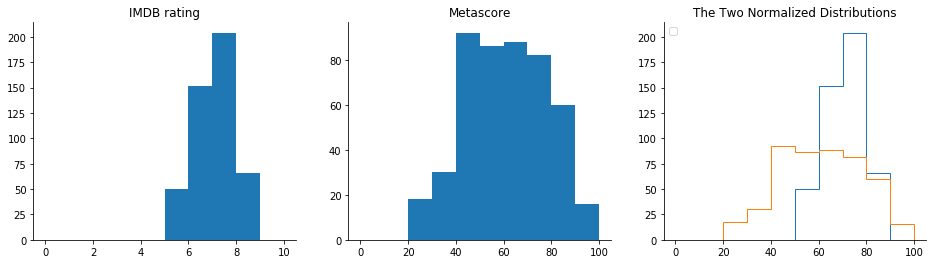

In [74]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16,4))
ax1, ax2, ax3 = fig.axes
ax1.hist(movie_ratings['imdb'], bins = 10, range = (0,10)) # bin range = 1
ax1.set_title('IMDB rating')
ax2.hist(movie_ratings['metascore'], bins = 10, range = (0,100)) # bin range = 10
ax2.set_title('Metascore')
ax3.hist(movie_ratings['n_imdb'], bins = 10, range = (0,100), histtype = 'step')
ax3.hist(movie_ratings['metascore'], bins = 10, range = (0,100), histtype = 'step')
ax3.legend(loc = 'upper left')
ax3.set_title('The Two Normalized Distributions')
for ax in fig.axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
plt.show()